In [2]:
from IPython.display import Image

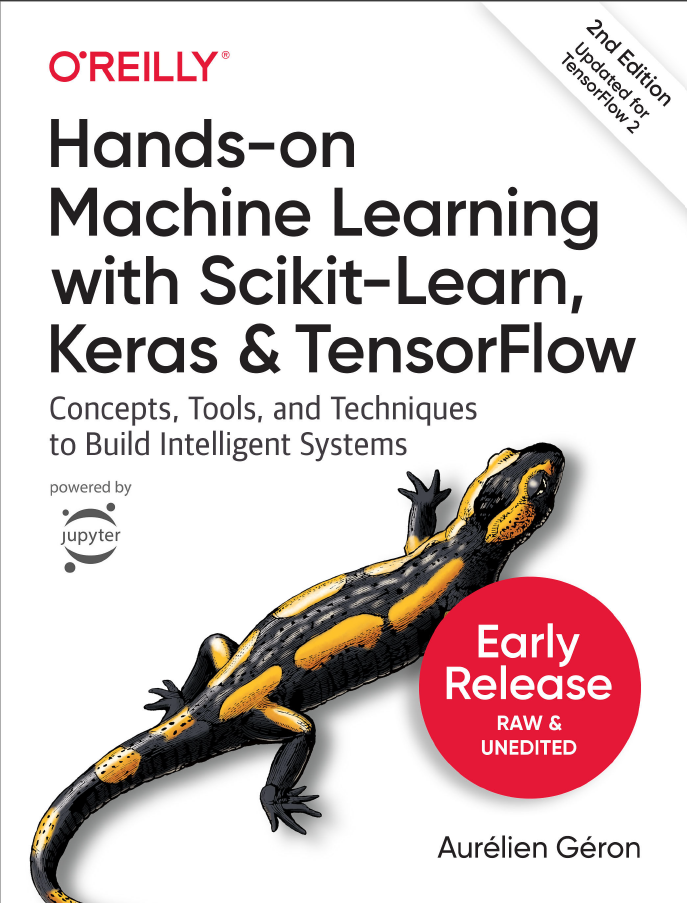

In [3]:
Image(filename='./figures/cover page.png')

# Hands-on Machine Learning with Sklearn, Keras and Tensorflow
# -- Code Example

## Packages check version

Add folder to path in order to load from the check_packages.py script:

In [1]:
import sys
sys.path.insert(0, '..')

In [2]:
from python_environment_check import check_packages

d = {
    'numpy': '1.21.2',
    'scipy': '1.7.0',
    'matplotlib': '3.4.3',
    'sklearn': '1.0',
    'pandas': '1.3.2'
}
check_packages(d)

[OK] Your Python version is 3.10.11 | packaged by Anaconda, Inc. | (main, Apr 20 2023, 18:56:50) [MSC v.1916 64 bit (AMD64)]
[OK] numpy 1.24.3
[OK] scipy 1.10.1
[OK] matplotlib 3.7.1
[OK] sklearn 1.2.2
[OK] pandas 1.5.3


# Chapter 2 - End-to-End Machine Learning Project

### Overview
   
    - In this chapter, you will go through an example project end to end, pretending to be a recently hired data scientist in a real estate company. Here are the main steps you will go through:

- [Working with Real Data](#Working-with-Real-Data)
- [Look at the Big Picture](##Look-at-the-Big-Picture)
    - [Frame the Problem](##Frame-the-Problem)
    - [Select a Performance Measure](##Select-a-Performance-Measure)
    - [Check the Assumptions](##Check-the-Assumptions)
- [Get the Data](#Get-the-Data)
    - [Create the Workspace](##Create-the-Workspace)
    - [Download the Data](##Download-the-Data)
    - [Take a Quick Look at the Data Structure](##Take-a-Quick-Look-at-the-Data-Structure)
    - [Create a Test Set](##Create-a-Test-Set)
- [Discover and Visualize the Data to Gain Insights](#Discover-and-Visualize-the-Data-to-Gain-Insights)
    - [Visualizing Geographical Data](##Visualizing-Geographical-Data)
    - [Looking for Correlations](##Looking-for-Correlations)
    - [Experimenting with Attribute Combinations](##Experimenting-with-Attribute-Combinations)
- [Prepare the Data for Machine Learning Algorithms](#Prepare-the-Data-for-Machine-Learning-Algorithms)
    - [Data Cleaning](##Data-Cleaning)
    - [Handling Text and Categorical Attributes](##Handling-Text-and-Categorical-Attributes)
    - [Custom Transformers](##Custom-Transformers)
    - [Feature Scaling](##Feature-Scaling)
    - [Transformation Pipelines](##Transformation-Pipelines)
- [Select and Train a Model](#Select-and-Train-a-Model)
    - [Training and Evaluating on the Training Set](##Training-and-Evaluating-on-the-Training-Set)
    - [Better Evaluation Using Cross-Validation](##Better-Evaluation-Using-Cross-Validation)
- [Fine-Tune Your Model](#Fine-Tune-Your-Model)
    - [Launch, Monitor, and Maintain Your System](##Launch,-Monitor,-and-Maintain-Your-System)
    - [Try It Out!](##Try-It-Out!)
    - [Exercises](##Exercises)
- [Summary](#Summary)

# Working with Real Data
[Overview](###Overview)
- When learning about ML it's better to experiment with real data, fortunately there are turn of open source data online to practice with. Here are some places you can get them:
     - Popular open data repositories:
          - [UC Irvine Machine Learning Repository](http://archive.ics.uci.edu/ml/)
          - [Kaggle datasets](https://www.kaggle.com/datasets)
          - [Amazon’s AWS datasets](https://registry.opendata.aws/)
     - Meta portals (they list open data repositories):
          - http://dataportals.org/
          - http://opendatamonitor.eu/
          - http://quandl.com/
     - Other pages listing many popular open data repositories:
          - [Wikipedia’s list of Machine Learning datasets](https://homl.info/9)
          - [Quora.com question](https://homl.info/10)
          - [Datasets subreddit](https://www.reddit.com/r/datasets)
- In this chapter we choose Califonia Housing Price datasets from StatLib Repository




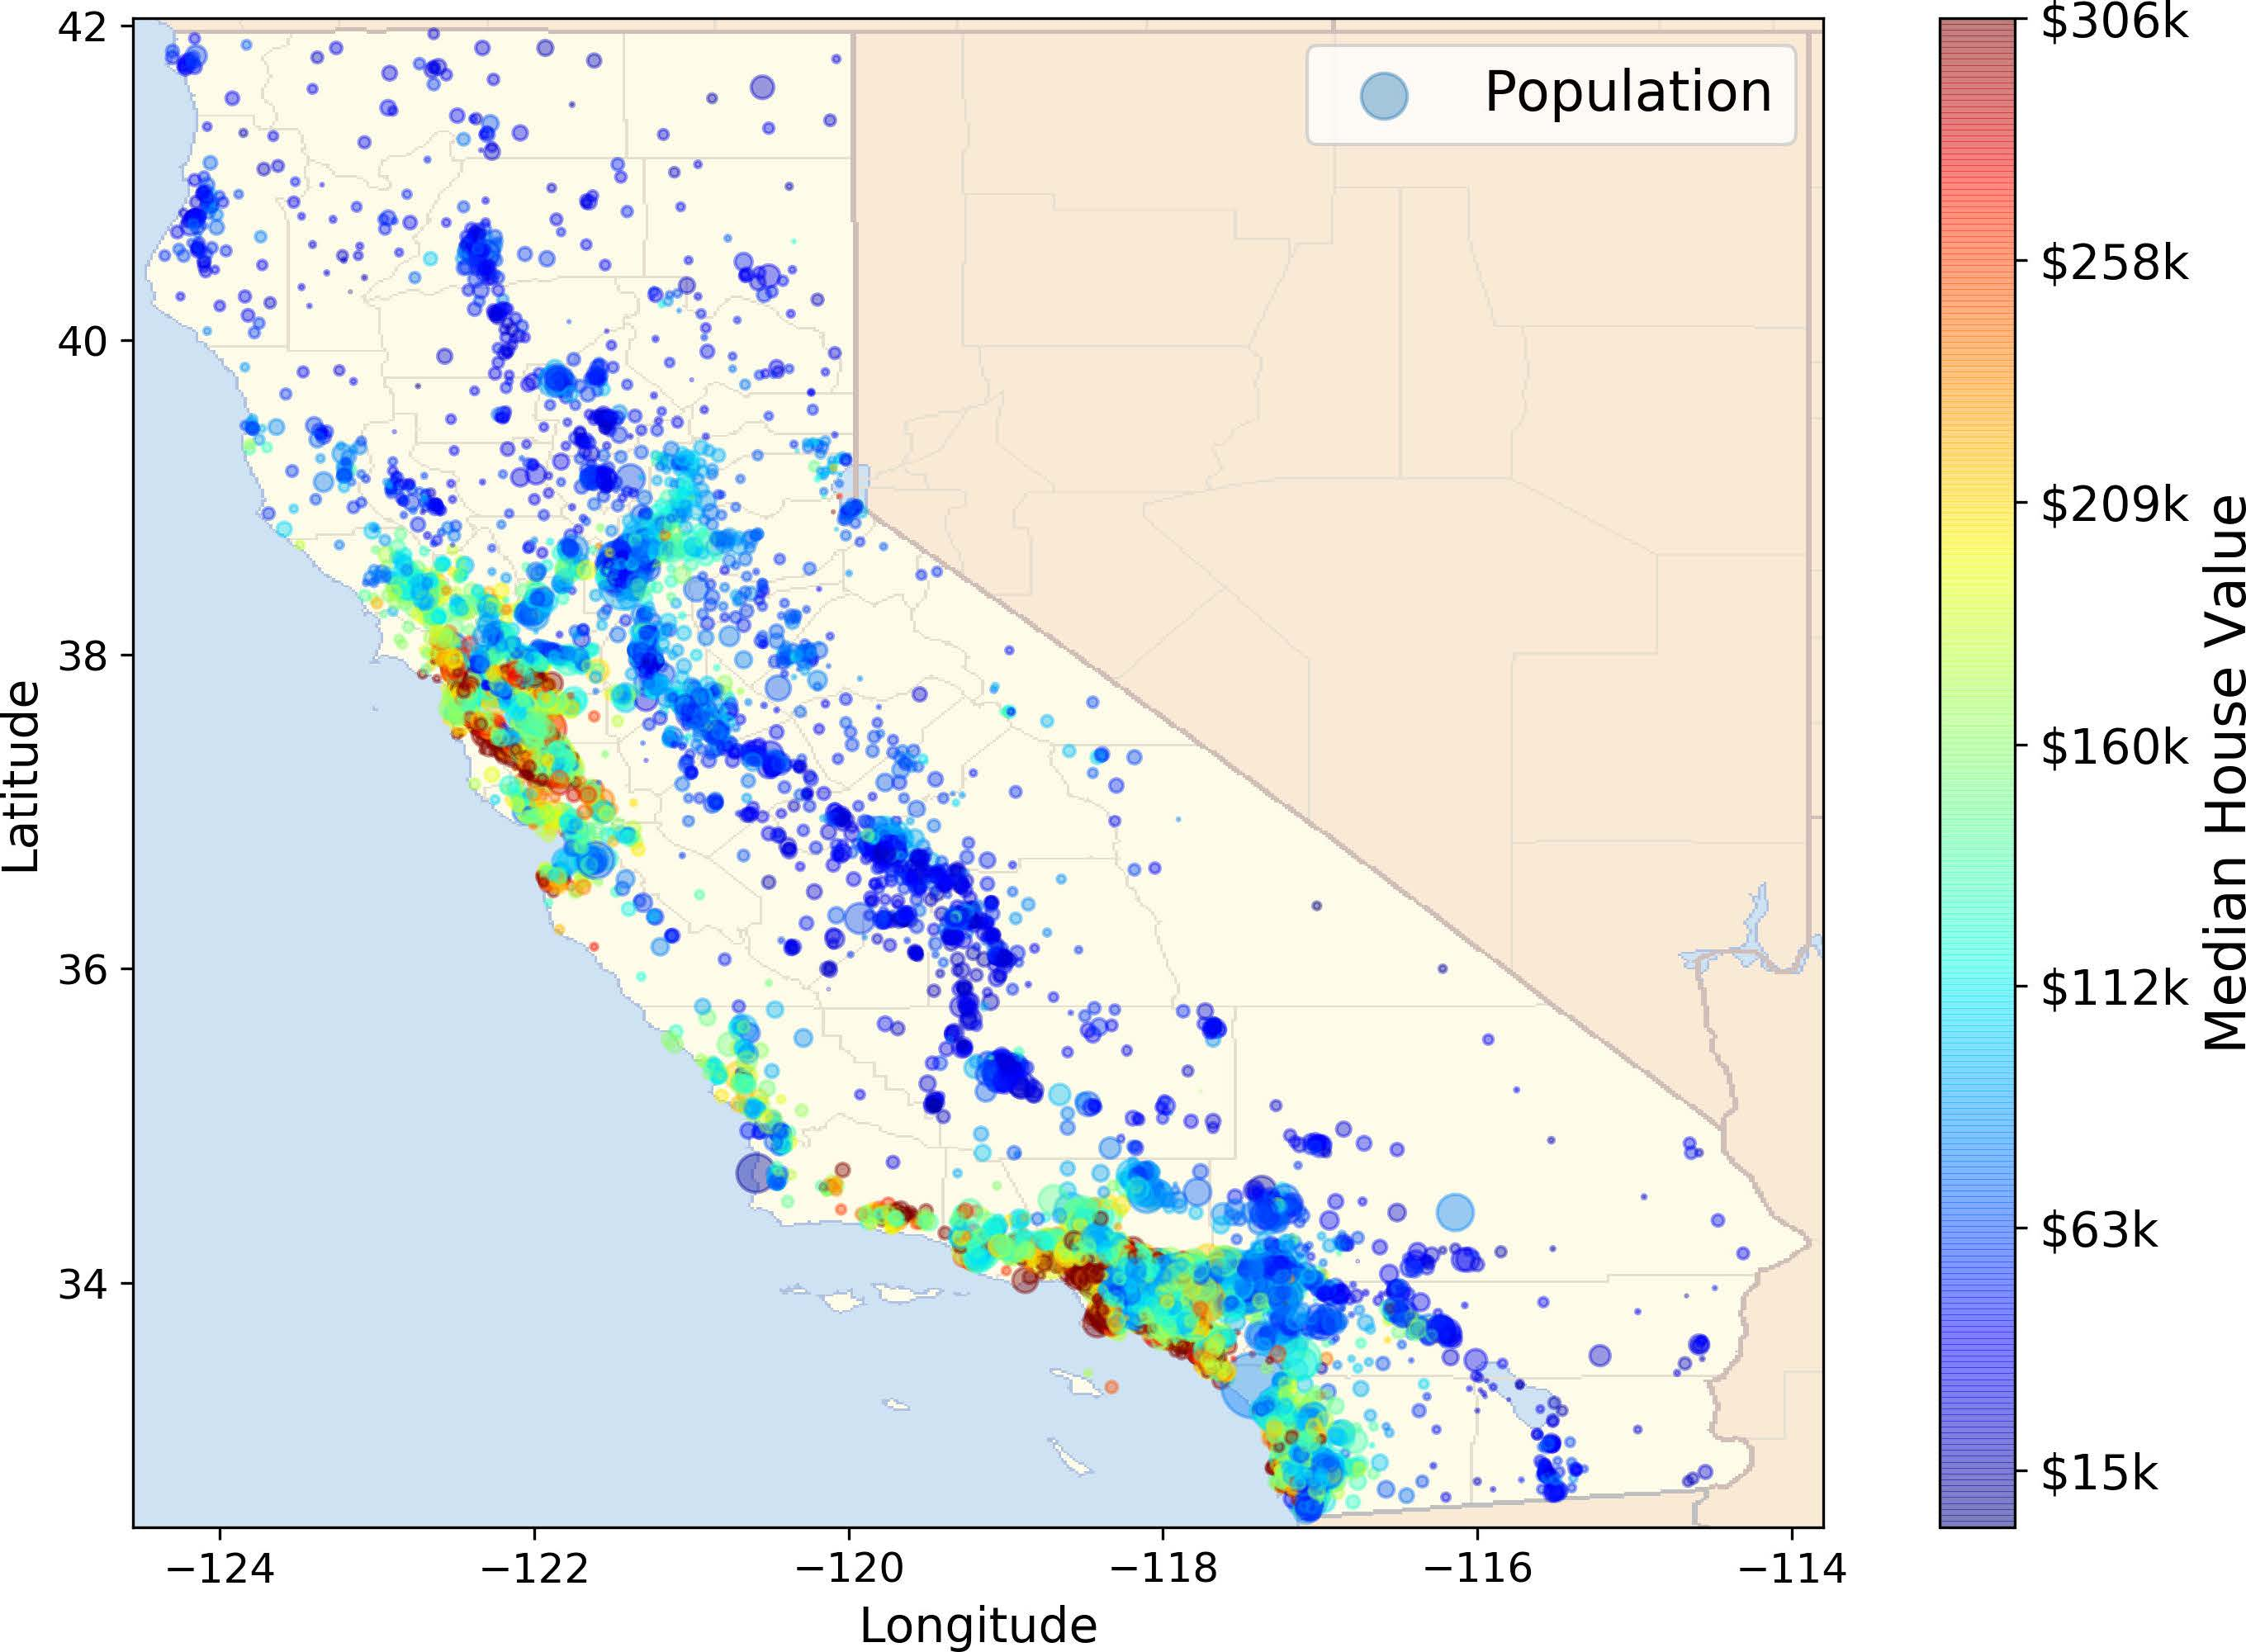

In [6]:
Image(filename='./figures/California housing prices.jpg', width=500) 

# Look at the Big Picture
[Overview](###Overview)
- Welcome to machine Learning Housing Price Colperation. The first task is to build model for house prices of California. The data have netrics like population, median income etc., for each block group.
     - Block groups are the smallest geographical unit for which the US Census Bureau publishes sample data (a block group typically has a population of 600 to 3,000 people). We will just call them “districts” for short.
     - Your model should learn from this data and be able to predict the median housing price in any district, given all the other metrics.


## Frame the Problem
[Overview](###Overview)

- The first question to ask is , what is the business objective? How does the company espect to benefit from this model? What performance mearsure you will use to evaluate your model and how much effort you should use to tweaking it?
    - Your boss answers that:
        - your model’s output (a prediction of a district’s median housing price) will be fed to another Machine Learning system, along with many other signals.
        - This downstream system will determine whether it is worth investing in a given area or not. Getting this right is critical, as it directly affects revenue.

- The next question to ask is what the current solution looks like (if any).:
    - Your boss answers that:
        - the district housing prices are currently estimated manually by experts: a team gathers up-to-date information about a district, and7 when they cannot get the median housing price, they estimate it using complex rules.

- you need to frame the problem:
    - is it supervised, unsupervised, or Reinforcement Learning? Is it a classification task, a regression task, or something else? Should you use batch learning or online learning techniques?
        - it is clearly a typical supervised learning task since you are given labeled training examples (each instance comes with the expected output, i.e., the district’s median housing price).
        - Moreover, it is also a typical regression task, since you are asked to predict a value.
        - More specifically, this is a multiple regression problem since the system will use multiple features to make a prediction (it will use the district’s population, the median income etc.)
        - It is also a univariate regression problem since we are only trying to predict a single value for each district.
            - If we were trying to predict multiple values per district, it would be a multivariate regression problem.
        - Finally, there is no continuous flow of data coming in the system, there is no particular need to adjust to changing data rapidly, and the data is small enough to fit in memory, so plain batch learning should do just fine.

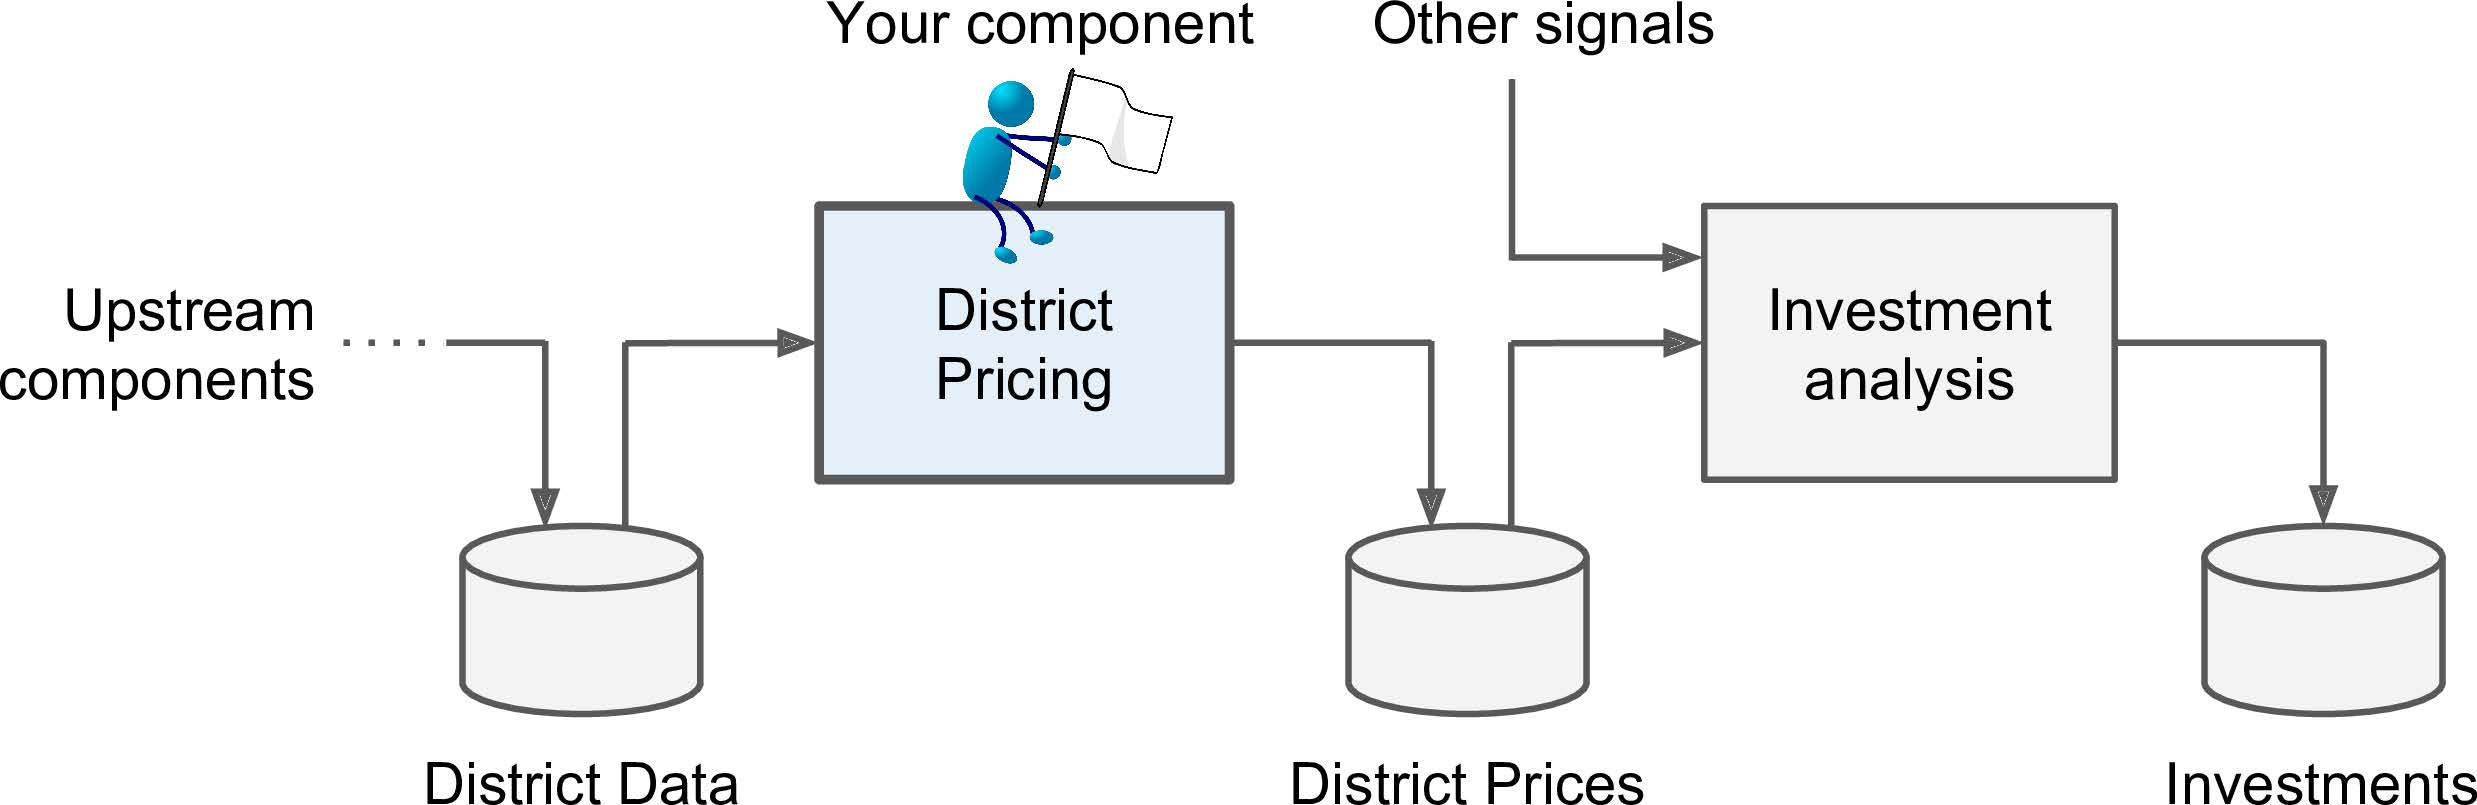

In [7]:
Image(filename='./figures/A machine learning pipeline for real estate investments.jpg', width=500)

## Select a Performance Measure
[Overview](###Overview)

- A typical performance measure for regression problems is the Root Mean Square Error (RMSE).

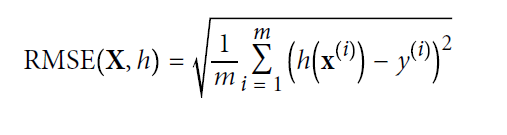

In [8]:
Image(filename='./figures/Root mean square error.png', width=500)

#### Notations

- m
    - is the number of instances in the dataset you are measuring the RMSE
        - eg, if you are evaluating the RMSE on a validation set of 2,000 districts, then m = 2,000.
- x(i)
    - vector of all the feature values (excluding the label) of the ith instance in the dataset, 
- y(i)
    - label (the desired output value for that instance).
- X 
    - matrix containing all the feature values (excluding labels) of all instances in the dataset. There is one row per instance and the ith row is equal to the transpose of x(i), noted (x(i))T.
- h
    - your system’s prediction function, also called a hypothesis. When your system is given an instance’s feature vector x(i), it outputs a predicted value ŷ(i) = h(x(i)) for that instance (ŷ is pronounced “y-hat”).
        — eg, if your system predicts that the median housing price in the first district is $158,400, then ŷ(1) = h(x(1)) = 158,400. The rediction error for this district is ŷ(1) – y(1) = 2,000.
- RMSE(X,h) 
    - the cost function measured on the set of examples using your hypothesis h.

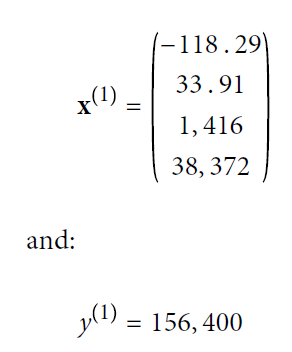

In [9]:
Image(filename='./figures/x(i) and y(i).png', width=500, height=100)

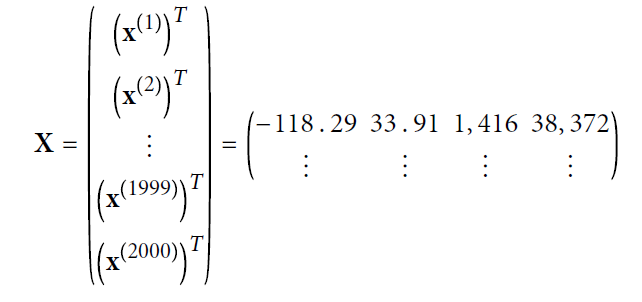

In [10]:

Image(filename='./figures/X Transpose.png', width=500)

- Even though the RMSE is generally the preferred performance measure for regression tasks, in some contexts you may prefer to use another function. 
    - eg, suppose that there are many outlier districts.
        - In that case, you may consider using the Mean Absolute Error

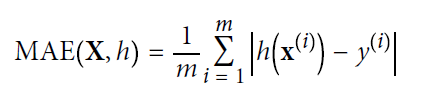

In [11]:
Image(filename='./figures/Mean absolute error.png', width=500)

- Both the RMSE and the MAE are ways to measure the distance between two vectors:
    - the vector of predictions and the vector of target values. 
- Various distance measures,or norms, are possible:
    - (RMSE) corresponds to the Euclidean norm:
        - it is the notion of distance you are familiar with.
            - It is also called the ℓ2 norm, noted ∥ · ∥2 (or just ∥ · ∥).

    - (MAE) corresponds to the ℓ1 norm, noted ∥ · ∥1.
        - It is sometimes called the Manhattan norm because it measures the distance between two points in a city if you can only travel along orthogonal city blocks.

    - More generally, the ℓk norm of a vector v containing n elements is defined as ∥ ? ∥k = v0 k + v1 k + ⋯ + vn k 1k. 
        - ℓ0 just gives the number of non-zero elements in the vector, and ℓ∞ gives the maximum absolute value in the vector.

- The higher the norm index, the more it focuses on large values and neglects small ones.
    - This is why the RMSE is more sensitive to outliers than the MAE. But when outliers are exponentially rare (like in a bell-shaped curve),the RMSE performs very well and is generally preferred.

## Check the Assumptions
[Overview](###Overview)

- Lastly, it is good practice to list and verify the assumptions that were made so far (by you or others); this can catch serious issues early on.

# Get the Data
[Overview](###Overview)

It’s time to get your hands dirty.

## Create the Workspace
[Overview](##overview)

...

## Download the Data
[Overview](##overview)

...

## Take a Quick Look at the Data Structure
[Overview](##overview)


In [3]:
import pandas as pd
import numpy as np
import os
import sklearn

In [4]:
data_path="./dataset/housing.csv"
def load_data(arg):
    return pd.read_csv(arg)

In [5]:
data= load_data(data_path)


- Let’s take a look at the top five rows using the DataFrame’s head() method

In [6]:
data.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


- info() is usefull to get quick description of data
    - this gives us total number of rows
    - each attribute type
    - number of non-null values

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


### Notice that
- total_bed rooms attribute has only 20,433 non-null values
    - meaning that 207 districts are missing this feature

- All attributes are numerical, except the ocean_proximity field.
    - Its type is object
        - means it is a categorical attribute
            - using value_count() methode to find the categories

In [8]:
data["ocean_proximity"].value_counts()

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64

- Lets look at the other fields
    - describe() methode show summary of the numerical attributes

In [9]:
data.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


- Here count, mean, min and max are self explanatory
- std measure how data are despersed
- 25% percentile, 50% percentile and 75% percentile are 1st quartile, median and 3rd quartile respectively
    - a percentile is the value below which a given percentage of observations in a group of observations falls.

- Another way to get insite is to draw histogram graph of the whole datasets

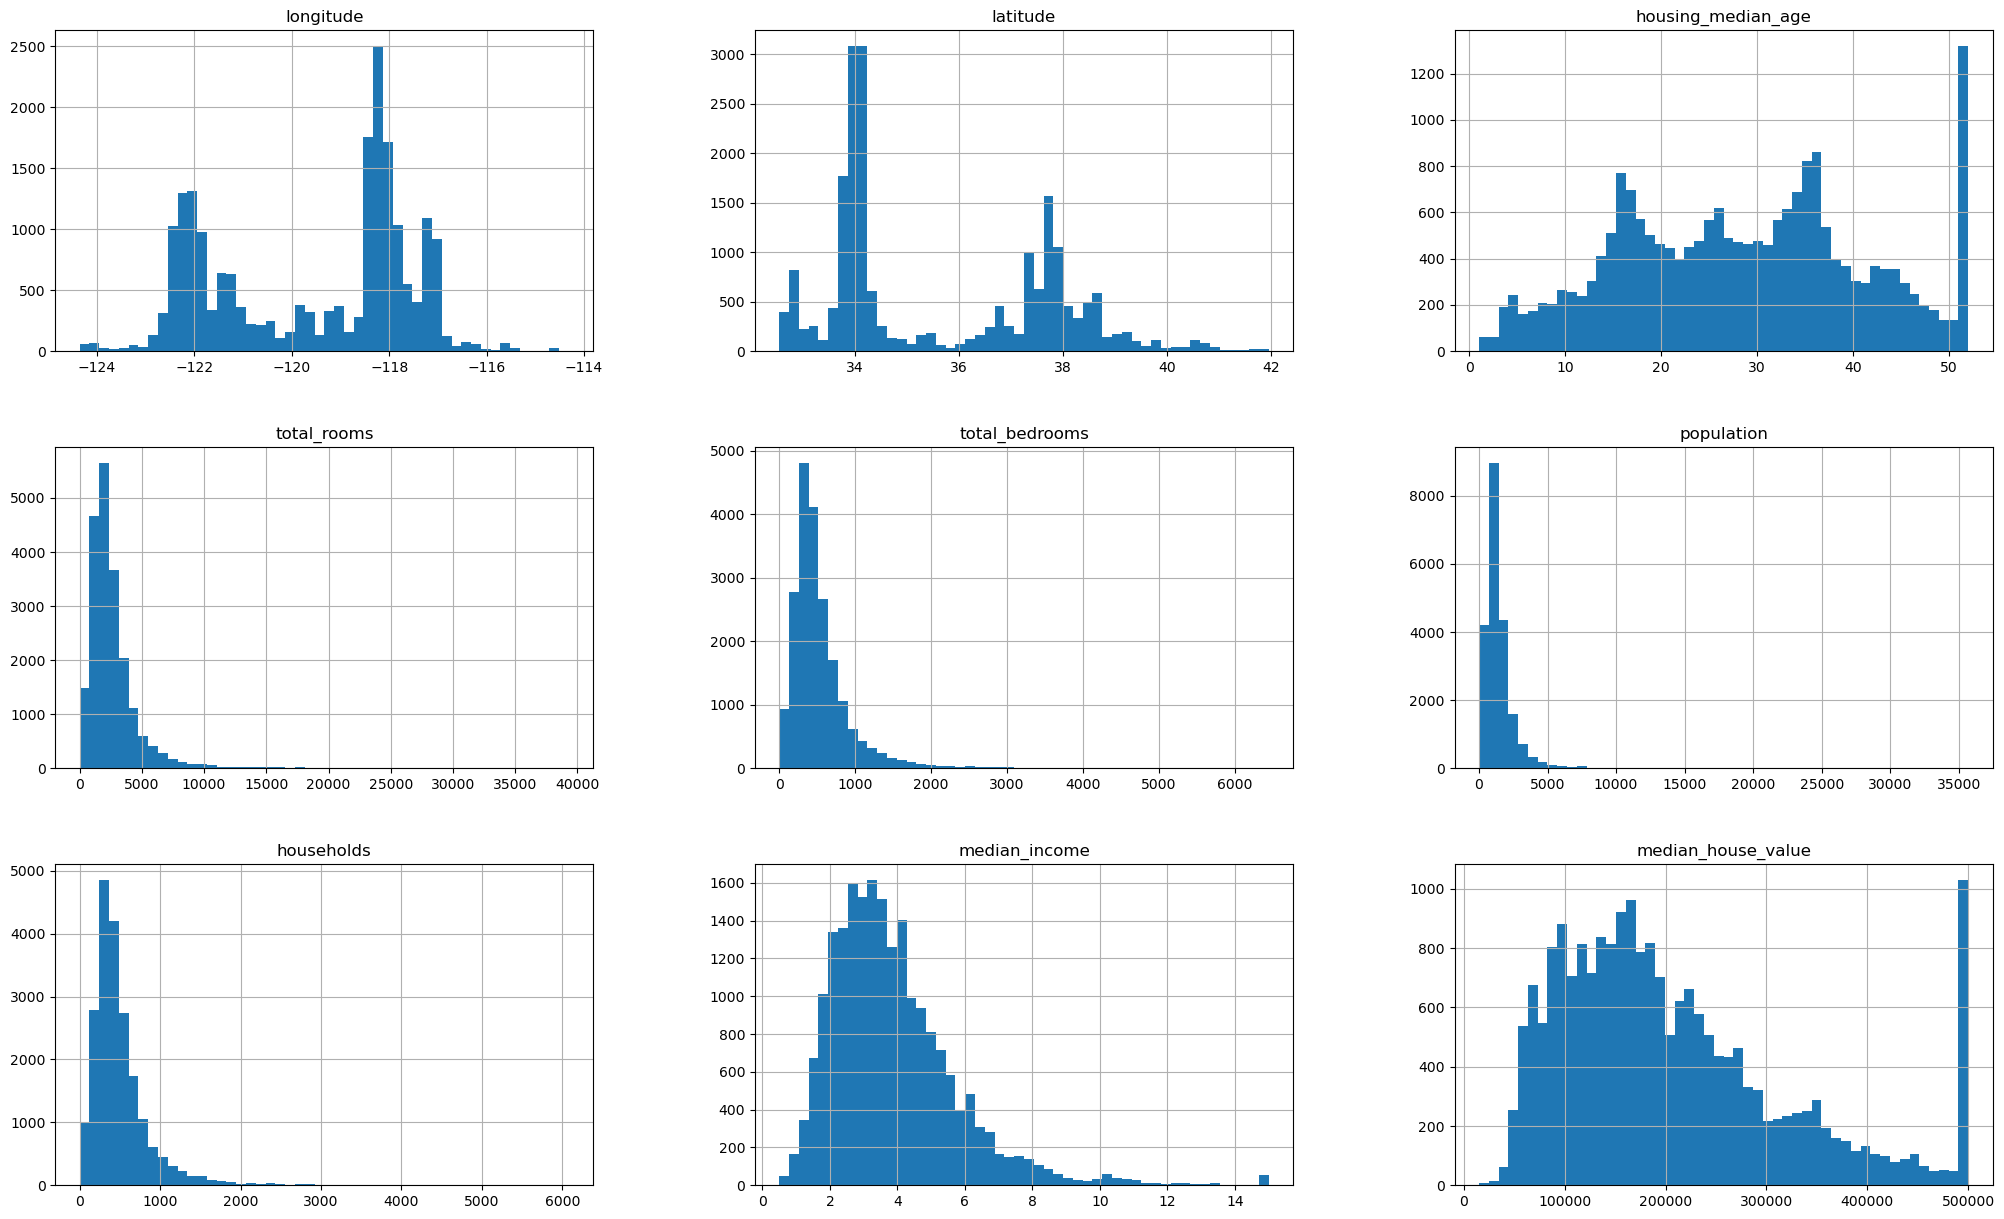

In [10]:
#easiest way of getting the understanding of your datasets is by using histogram,

%matplotlib inline
import matplotlib.pyplot as plt

data.hist(figsize=(25,15), bins=50)
plt.show()

## Create a Test Set
[Overview](##Overview)

In [385]:
def split_train_test(data, test_ratio, random_seed):
    rseed=np.random.RandomState(random_seed)
    shuffled_index=rseed.permutation(len(data))
    test_set_size=int(test_ratio*len(data))
    test_index=shuffled_index[:test_set_size]
    train_index=shuffled_index[test_set_size:]
    return data.iloc[train_index], data.iloc[test_index]

In [386]:
train_set, test_set=split_train_test(data, 0.2, 42)

In [387]:
from zlib import crc32

In [388]:
#computing instance's identifier hash,
# and test them if there are less or equal to 20% of maximum hash
def test_set_check(id, test_ratio):
    return crc32(np.int64(id)) & 0xffffffff < test_ratio*2**32

In [389]:
# spliting instances using instance identifier hash
def train_test_set_with_id(data, test_ratio, id):
    ids=data[id]
    test_set_id=ids.apply(lambda _id:test_set_check(_id, test_ratio))
    return data.loc[~test_set_id], data.loc[test_set_id]
    

In [390]:
# calling a funtion
train_set_with_id, test_set_with_id=train_test_set_with_id(data_with_id, 0.2, 'id')

In [391]:
from sklearn.model_selection import train_test_split

In [392]:
train_set, test_set=train_test_split(data, test_size=0.2, random_state=42, shuffle=True)

In [393]:
train_set_with_id.head()

,index,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,id
0,0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY,-122192.12
1,1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY,-122182.14
2,2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY,-122202.15
3,3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY,-122212.15
4,4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY,-122212.15


- random_seed help us to generate the same shuffled indices

- but this code breakes the next time you fetch an update dataset.
    - a common solution is to use each instance's identifier to decided whether or not it should go in the test set or not

- eg, you could compute a hash of each instance’s identifier and put that instance in the test set if the hash is lower or equal to 20% of the maximum hash value. This ensures that the test set will remain consistent across multiple runs, even if you refresh the dataset.

In [17]:
from zlib import crc32

def test_set_check(identifier, test_ratio):
    return crc32(np.int64(identifier)) & 0xffffffff < test_ratio*2**32


In [18]:
def split_train_test_by_id(data, test_ratio, column_id):
    ids=data[column_id]
    in_test_set=ids.apply(lambda id_:test_set_check(id_,test_ratio))
    return data.loc[~in_test_set], data.loc[in_test_set]

- since in our datasets there is no id_column we will use latitude and longtude since there will be contant through out the data even for new instance

- first you can add row index as identifier using reset_index object
    - but the problem with this is that:
        - you have to append new data at the end of the datasets
        - no row will ever be deleted

In [396]:
data_with_id=data.reset_index()

- so instead you can use any constant attributes that will never change
    - in case of our datasets is latitude and longitude

In [20]:

data['id']=data['longitude']*1000 + data['latitude']

In [21]:
data_with_id=data

In [22]:
data_with_id

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,id
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY,-122192.12
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY,-122182.14
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY,-122202.15
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY,-122212.15
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY,-122212.15
...,...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND,-121050.52
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND,-121170.51
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND,-121180.57
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND,-121280.57


In [23]:
train_set_with_id, test_set_with_id=split_train_test_by_id(data_with_id, 0.2, 'id')

In [24]:
train_set_with_id.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,id
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY,-122192.12
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY,-122182.14
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY,-122202.15
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY,-122212.15
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY,-122212.15


In [25]:
test_set_with_id.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,id
59,-122.29,37.82,2.0,158.0,43.0,94.0,57.0,2.5625,60000.0,NEAR BAY,-122252.18
60,-122.29,37.83,52.0,1121.0,211.0,554.0,187.0,3.3929,75700.0,NEAR BAY,-122252.17
61,-122.29,37.82,49.0,135.0,29.0,86.0,23.0,6.1183,75000.0,NEAR BAY,-122252.18
62,-122.29,37.81,50.0,760.0,190.0,377.0,122.0,0.9011,86100.0,NEAR BAY,-122252.19
67,-122.29,37.80,52.0,1027.0,244.0,492.0,147.0,2.6094,81300.0,NEAR BAY,-122252.20


- you can use sklearn as well

In [402]:
from sklearn.model_selection import train_test_split

train_set, test_set=train_test_split(data, test_size=0.2, random_state=42, shuffle=True)

In [403]:
train_set.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
14196,-117.03,32.71,33.0,3126.0,627.0,2300.0,623.0,3.2596,103000.0,NEAR OCEAN
8267,-118.16,33.77,49.0,3382.0,787.0,1314.0,756.0,3.8125,382100.0,NEAR OCEAN
17445,-120.48,34.66,4.0,1897.0,331.0,915.0,336.0,4.1563,172600.0,NEAR OCEAN
14265,-117.11,32.69,36.0,1421.0,367.0,1418.0,355.0,1.9425,93400.0,NEAR OCEAN
2271,-119.80,36.78,43.0,2382.0,431.0,874.0,380.0,3.5542,96500.0,INLAND


In [404]:
test_set.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
20046,-119.01,36.06,25.0,1505.0,NaN,1392.0,359.0,1.6812,47700.0,INLAND
3024,-119.46,35.14,30.0,2943.0,NaN,1565.0,584.0,2.5313,45800.0,INLAND
15663,-122.44,37.80,52.0,3830.0,NaN,1310.0,963.0,3.4801,500001.0,NEAR BAY
20484,-118.72,34.28,17.0,3051.0,NaN,1705.0,495.0,5.7376,218600.0,<1H OCEAN
9814,-121.93,36.62,34.0,2351.0,NaN,1063.0,428.0,3.7250,278000.0,NEAR OCEAN


- so far we have considered random sampling, which is ok if you have large enough datasets.

- but if you have small datasets and use random sampling you will run in a risk of introducing sampling bias, so we need to use stratified sampling

- in stratified sampling the datasets is devided into homogeneous subgroup called strata

- and the right number of instances is sampled from each stratum to guarantee that the test set is representantive of the overall datasets

In [21]:
data.head(2)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY


<Axes: >

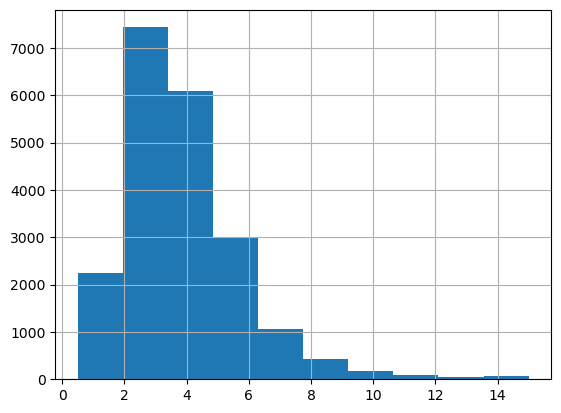

In [11]:
"""
Suppose you chatted with experts who told you that the median income is a very
important attribute to predict median housing prices. You may want to ensure that
the test set is representative of the various categories of incomes in the whole dataset.
Since the median income is a continuous numerical attribute, you first need to create
an income category attribute. Let’s look at the median income histogram more closely,
you can see most median income values are clustered around 1.5 to 6 (i.e.,
$15,000–$60,000), but some median incomes go far beyond 6. It is important to have
a sufficient number of instances in your dataset for each stratum, or else the estimate
of the stratum’s importance may be biased. This means that you should not have too
many strata, and each stratum should be large enough. The following code uses the
pd.cut() function to create an income category attribute with 5 categories (labeled
from 1 to 5): category 1 ranges from 0 to 1.5 (i.e., less than $15,000), category 2 from
1.5 to 3, and so on:
"""
data['median_income'].hist()

<Axes: >

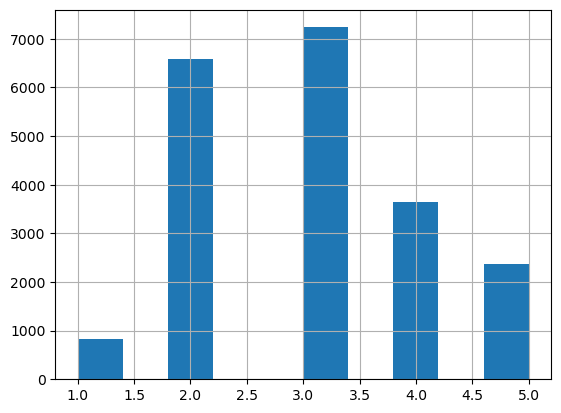

In [12]:
#Stratified Sampling
#If you have small datasets and you used random sampling like the above one,
# you will be in the risk of bias, so you need to use Stratified Sampling

data['income_cat']=pd.cut(data['median_income'], bins=[0., 1.5, 3.0, 4.5, 6., np.inf], labels=[1, 2, 3, 4, 5])

data['income_cat'].hist()

In [13]:
"""
Now you are ready to do stratified sampling based on the income category. For this
you can use Scikit-Learn’s StratifiedShuffleSplit class:
"""

from sklearn.model_selection import StratifiedShuffleSplit, train_test_split

sss=StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)

for i, (train_index, test_index) in enumerate(sss.split(data, data['income_cat'])):
    strat_train_set=data.loc[train_index]
    strat_test_set=data.loc[test_index]
    print(f"Fold : {i}")
    print(" - - "*10)
    print(f"Train set: {strat_train_set}")
    print(" - - "*10)
    print(f"Test sets : {strat_test_set}")
    print(" - - "*10)

Fold : 0
 - -  - -  - -  - -  - -  - -  - -  - -  - -  - - 
Train set:        longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
12655    -121.46     38.52                29.0       3873.0           797.0   
15502    -117.23     33.09                 7.0       5320.0           855.0   
2908     -119.04     35.37                44.0       1618.0           310.0   
14053    -117.13     32.75                24.0       1877.0           519.0   
20496    -118.70     34.28                27.0       3536.0           646.0   
...          ...       ...                 ...          ...             ...   
15174    -117.07     33.03                14.0       6665.0          1231.0   
12661    -121.42     38.51                15.0       7901.0          1422.0   
19263    -122.72     38.44                48.0        707.0           166.0   
19140    -122.70     38.31                14.0       3155.0           580.0   
19773    -122.14     39.97                27.0       1079.0 

In [14]:
"""
Let’s see if this worked as expected. You can start by looking at the income category
proportions in the test set:
"""
strat_train_set["income_cat"].value_counts()/ len(strat_train_set)

3    0.350594
2    0.318859
4    0.176296
5    0.114462
1    0.039789
Name: income_cat, dtype: float64

In [15]:
strat_train_set.head(2)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,income_cat
12655,-121.46,38.52,29.0,3873.0,797.0,2237.0,706.0,2.1736,72100.0,INLAND,2
15502,-117.23,33.09,7.0,5320.0,855.0,2015.0,768.0,6.3373,279600.0,NEAR OCEAN,5


In [16]:
data['income_cat'].value_counts()/len(data)

3    0.350581
2    0.318847
4    0.176308
5    0.114438
1    0.039826
Name: income_cat, dtype: float64

In [31]:
train,test=train_test_split(data, test_size=0.2, random_state=42, shuffle=True)
test['income_cat'].value_counts()/len(test)

3    0.358527
2    0.324370
4    0.167393
5    0.109496
1    0.040213
Name: income_cat, dtype: float64

- With the test set generated with random sampling (test) and Stratified Sampling(strat_test_set), If we compare the income category of test, strat_test_set and overall dataset we can see that test set generated with Stratified Sampling proportions almost identicle to those of full dataset, while test set generate with Random Sampling is bit skewed.

- Now let us drop the income_cat from our Stratified Sampling train and test set so that our dataset will return to it's original

In [17]:
attr=['income_cat']
for _set in (strat_train_set, strat_test_set):
    _set.drop(attr, axis=1, inplace=True)

In [18]:
strat_train_set.head(2)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
12655,-121.46,38.52,29.0,3873.0,797.0,2237.0,706.0,2.1736,72100.0,INLAND
15502,-117.23,33.09,7.0,5320.0,855.0,2015.0,768.0,6.3373,279600.0,NEAR OCEAN


# Discover and Visualize the Data to Gain Insights
[Overview](###Overview)

- After getting general understanding of our dataset, now let go deep

- Here after we will work with train set, and if the train set is too large you can take a small portion of it

In [19]:
# Create a copy that you can play with without harm the training set
housing=strat_train_set.copy()

## Visualizing Geographical Data
[Overview](###Overview)

- Since there are longitude and latitude, lets try to plot them

<Axes: xlabel='longitude', ylabel='latitude'>

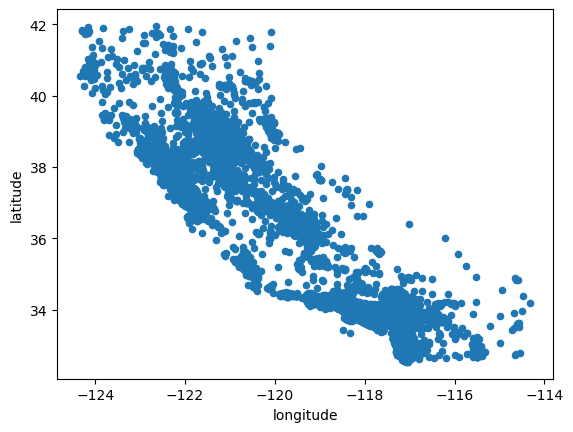

In [20]:
# scatterplot of all districts to visualize the data

housing.plot(kind="scatter", x="longitude", y="latitude")



- Lets put alpha = 0.1 to make it easier to see more dense places

<Axes: xlabel='longitude', ylabel='latitude'>

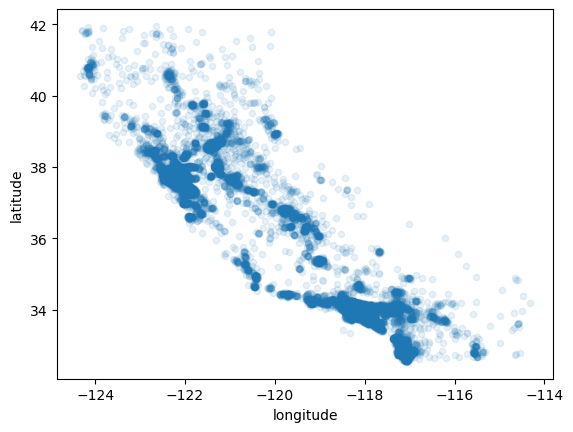

In [21]:
housing.plot(kind='scatter', x='longitude', y='latitude', alpha=0.1)

- Now let's take a look at the housing price 
    - the radius of each circle will represent population (option s)
    - the color will represent price (option c)
        - we use pre define color map (option camp) called jet which ranges from blue(low ) to high (red)

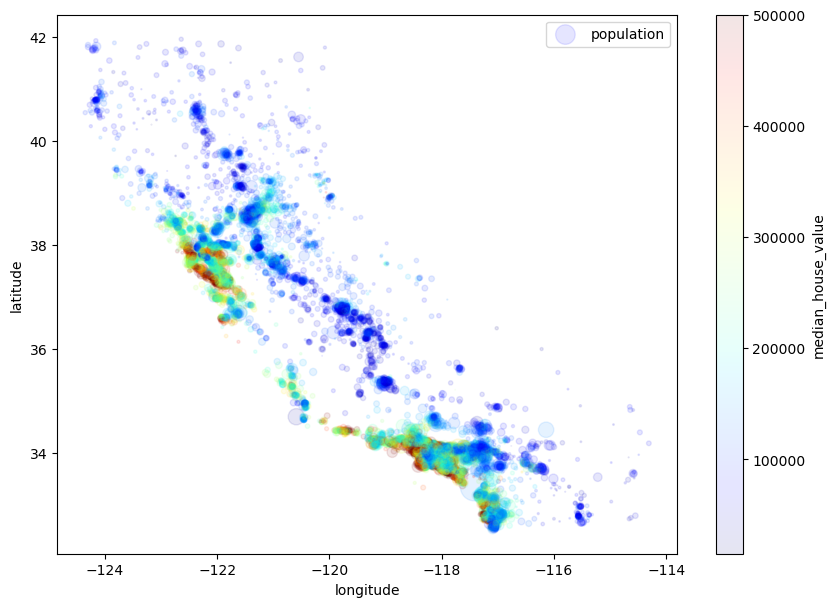

In [22]:
# import matplotlib
import matplotlib.pyplot as plt
housing.plot(kind="scatter", x="longitude", y="latitude", alpha=0.1, s=housing['population']/90, c='median_house_value', cmap=plt.get_cmap('jet'), label='population', figsize=(10,7), colorbar=True)
plt.legend()

In [34]:
"""
This image tells you that the housing prices are very much related to the location
(e.g., close to the ocean) and to the population density, as you probably knew already.
It will probably be useful to use a clustering algorithm to detect the main clusters, and
add new features that measure the proximity to the cluster centers. The ocean proximity
attribute may be useful as well, although in Northern California the housing
prices in coastal districts are not too high, so it is not a simple rule.
"""

'\nThis image tells you that the housing prices are very much related to the location\n(e.g., close to the ocean) and to the population density, as you probably knew already.\nIt will probably be useful to use a clustering algorithm to detect the main clusters, and\nadd new features that measure the proximity to the cluster centers. The ocean proximity\nattribute may be useful as well, although in Northern California the housing\nprices in coastal districts are not too high, so it is not a simple rule.\n'

## Looking for Correlations
[Overview](###Overview)

- Because this dataset is not large, we can just compute standard correlation coeficient using corr() method

In [23]:
corr_matrix=housing.corr()

C:\Users\clint\AppData\Local\Temp\ipykernel_22944\4692807.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix=housing.corr()


- Now let see how each attribute is correlates to mediun_house_price

In [24]:
corr_matrix['median_house_value'].sort_values(ascending=False)

median_house_value    1.000000
median_income         0.687151
total_rooms           0.135140
housing_median_age    0.114146
households            0.064590
total_bedrooms        0.047781
population           -0.026882
longitude            -0.047466
latitude             -0.142673
Name: median_house_value, dtype: float64

- Correlation coefficient ranges from -1 to 1
    - -1 mean the strong negative correlation 
    - 1 mean the strong positive correlation
    - close to zero coeficient mean there is not linear correlation

- Now let's take the attributes with high correlation coefficient and plot them to get more insight of our datasets

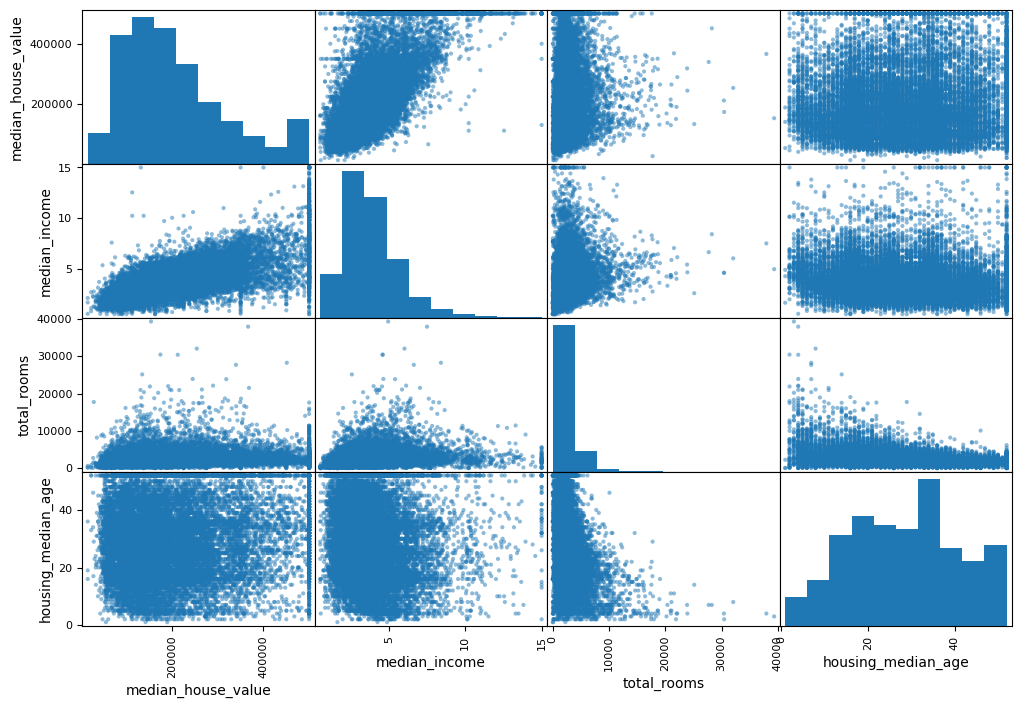

In [25]:
from pandas.plotting import scatter_matrix

attributes=['median_house_value', 'median_income', 'total_rooms', 'housing_median_age']
scatter_matrix(housing[attributes], figsize=(12,8))
plt.show()

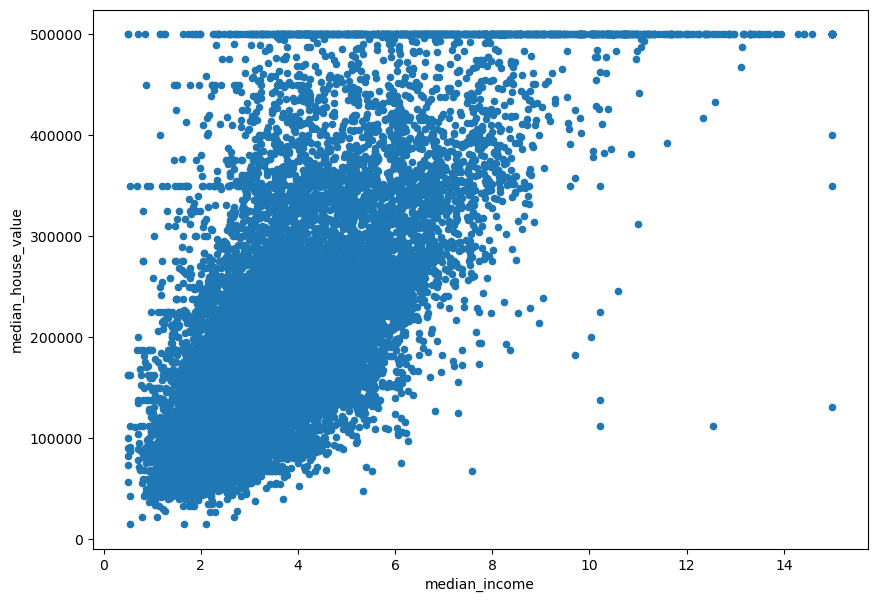

In [26]:
housing.plot(kind='scatter', x='median_income', y='median_house_value', figsize=(10,7))
plt.show()

## Experimenting with Attribute Combinations
[Overview](###Overview)

- Above visuallization give you more insight on high corretion coefficient attribute

- Before actually preparing data for machine learning, let's try to combine some attributes

- What we rally want 
    - room per house hold
    - bedroom per room
    - population per house hold

In [421]:

housing["room_per_household"]=housing["total_rooms"]/housing["households"]
housing["bedrooms_per_room"]=housing["total_bedrooms"]/housing["total_rooms"]
housing["population_per_household"]=housing["population"]/housing["households"]

In [422]:
corr=housing.corr()
corr["median_house_value"].sort_values(ascending=False)

C:\Users\clint\AppData\Local\Temp\ipykernel_2256\465484051.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr=housing.corr()


median_house_value          1.000000
median_income               0.687151
room_per_household          0.146255
total_rooms                 0.135140
housing_median_age          0.114146
households                  0.064590
total_bedrooms              0.047781
population_per_household   -0.021991
population                 -0.026882
longitude                  -0.047466
latitude                   -0.142673
bedrooms_per_room          -0.259952
Name: median_house_value, dtype: float64

- The new bedrooms_per_room attribute is much more correlated with the median house value than the total number of rooms or bedrooms. 
    - Apparently houses with a lower bedroom/room ratio tend to be more expensive. 
- The number of rooms per household is also more informative than the total number of rooms in a district obviously the larger the houses, the more expensive they are.

- This round of exploration does not have to be absolutely thorough; the point is to
start off on the right foot and quickly gain insights that will help you get a first reasonably
good prototype. But this is an iterative process: once you get a prototype up
and running, you can analyze its output to gain more insights and come back to this
exploration step.

# Prepare the Data for Machine Learning Algorithms
[Overview](###Overview)

- Now lets's prepare data for Machine Learning
    - instead of doing it manually we should write a function to do so for the following good reasons
        - reproduce tranformation in new datasets
        - can be used in future projects
        - can be used in live system
        - easier to try variuos transformations and which is work well

- Let's first drop the labels

In [27]:
housing= strat_train_set.drop('median_house_value', axis=1)
housing_label=strat_train_set['median_house_value'].copy()

## Data Cleaning
[Overview](###Overview)

- Most ML can not work with missing features, few functions to take care of them
    - get rid of the corresponding district
        - dropna()
    - get rid of the whole attribute
        - drop()
    - set the value to some value(zero, mean, median)
        - fillna()

In [424]:
# housing.dropna(subset=['total_bedrooms']) #option 1
# housing['total_bedrooms'].isna()

12655    False
15502    False
2908     False
14053    False
20496    False
         ...  
15174    False
12661    False
19263    False
19140    False
19773    False
Name: total_bedrooms, Length: 16512, dtype: bool

In [425]:
# housing.drop('total_bedrooms', axis=1) #option 2

,longitude,latitude,housing_median_age,total_rooms,population,households,median_income,ocean_proximity
12655,-121.46,38.52,29.0,3873.0,2237.0,706.0,2.1736,INLAND
15502,-117.23,33.09,7.0,5320.0,2015.0,768.0,6.3373,NEAR OCEAN
2908,-119.04,35.37,44.0,1618.0,667.0,300.0,2.8750,INLAND
14053,-117.13,32.75,24.0,1877.0,898.0,483.0,2.2264,NEAR OCEAN
20496,-118.70,34.28,27.0,3536.0,1837.0,580.0,4.4964,<1H OCEAN
...,...,...,...,...,...,...,...,...
15174,-117.07,33.03,14.0,6665.0,2026.0,1001.0,5.0900,<1H OCEAN
12661,-121.42,38.51,15.0,7901.0,4769.0,1418.0,2.8139,INLAND
19263,-122.72,38.44,48.0,707.0,458.0,172.0,3.1797,<1H OCEAN
19140,-122.70,38.31,14.0,3155.0,1208.0,501.0,4.1964,<1H OCEAN


In [426]:
# median=housing['total_bedrooms'].median() #option 3
# housing['total_bedrooms'].fillna(median, inplace=True)

- This last option 3
    - the median must be computed from the train set, then saved 
    - latter on you will that median to fill null values of test set ang even of new datasets

- sklearn provideclass to help us perform this
    - SimpleImputer class

In [45]:
from sklearn.impute import SimpleImputer

In [428]:
s_i=SimpleImputer(strategy='median')

- Since SimpleImputer can only cumpute median using numerical dataset

In [46]:
housing_num=housing.drop('ocean_proximity', axis=1)

- Now let's fit the training datasets using fit() method

In [430]:
s_i.fit(housing_num)

SimpleImputer(strategy='median')

- SimpleImputer simply do calculate the median of the numerical instance of whole dataset and store it in statistics_ instance.
- for now total_beadrooms attribute is the only one with nall values but we don't which attribute will have nall values in new datasets, so we have to apply imputer to whole datasets.

In [431]:
s_i.statistics_

array([-118.51   ,   34.26   ,   29.     , 2119.     ,  433.     ,
       1164.     ,  408.     ,    3.54155])

In [432]:
housing_num.median().values

array([-118.51   ,   34.26   ,   29.     , 2119.     ,  433.     ,
       1164.     ,  408.     ,    3.54155])

- Use the trained imputer to transform the entire dataset

In [433]:
housing_num.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16512 entries, 12655 to 19773
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           16512 non-null  float64
 1   latitude            16512 non-null  float64
 2   housing_median_age  16512 non-null  float64
 3   total_rooms         16512 non-null  float64
 4   total_bedrooms      16512 non-null  float64
 5   population          16512 non-null  float64
 6   households          16512 non-null  float64
 7   median_income       16512 non-null  float64
dtypes: float64(8)
memory usage: 1.1 MB


In [434]:
X=s_i.transform(housing_num)

- The result of transformed feature is the plain NumPy Array, to convert it back to Pandas use Pandas DataFrame

In [435]:
housing_tr=pd.DataFrame(X, columns=housing_num.columns)

In [436]:
housing_tr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16512 entries, 0 to 16511
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           16512 non-null  float64
 1   latitude            16512 non-null  float64
 2   housing_median_age  16512 non-null  float64
 3   total_rooms         16512 non-null  float64
 4   total_bedrooms      16512 non-null  float64
 5   population          16512 non-null  float64
 6   households          16512 non-null  float64
 7   median_income       16512 non-null  float64
dtypes: float64(8)
memory usage: 1.0 MB


## Handling Text and Categorical Attributes
[Overview](###Overview)

- Previously we letf 'ocean_proxy' because it was categorical data we could not compute median

In [47]:
housing_cat=housing[['ocean_proximity']]
housing_cat.head(10)

,ocean_proximity
12655,INLAND
15502,NEAR OCEAN
2908,INLAND
14053,NEAR OCEAN
20496,<1H OCEAN
1481,NEAR BAY
18125,<1H OCEAN
5830,<1H OCEAN
17989,<1H OCEAN
4861,<1H OCEAN


In [48]:
housing_cat.shape

(16512, 1)

- Machine Learning does not understand categories, so we have to convert our categorical data to numerical

In [108]:
from sklearn.preprocessing import OrdinalEncoder , OneHotEncoder

In [440]:
ordinal_encoder=OrdinalEncoder()

In [441]:
housing_cat_encoded=ordinal_encoder.fit_transform(housing_cat)

In [442]:
housing_cat_encoded[:10]

array([[1.],
       [4.],
       [1.],
       [4.],
       [0.],
       [3.],
       [0.],
       [0.],
       [0.],
       [0.]])

- You can get list of categories by using categories_ instance variable

In [443]:
ordinal_encoder.categories_

[array(['<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN'],
       dtype=object)]

- The issue with this representation is that:
    - Machine Learnig algorithm tend to assume that two nearby values are more similar than two distant values.

- This would be fine for some cases like
    - ordered categories such as 'bad', 'good', 'excelent'
    - But it obviously in ocean_proximity is not the case

- To fix this issue we will use one-hot encoder
    - in one-hot encoder only one attribute is going to be 1 (hot) and the other will be 0 (cold)

In [28]:
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder

In [445]:
cat_encoder=OneHotEncoder()

In [446]:
housing_cat_1hot=cat_encoder.fit_transform(housing_cat)

In [447]:
housing_cat_1hot

<16512x5 sparse matrix of type '<class 'numpy.float64'>'
	with 16512 stored elements in Compressed Sparse Row format>

- As youu can see the output is in SciPy sparse matrix instead of numpy array
    - this help to preserve the memory by saving just the location of the non-zero element to save the memory that would have used to store zeros

In [448]:
housing_cat_1hot.toarray()

array([[0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 1.],
       [0., 1., 0., 0., 0.],
       ...,
       [1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0.]])

- Once again you can get liast of the categories using the encoder's categories_ instance variable

In [449]:
cat_encoder.categories_

[array(['<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN'],
       dtype=object)]

## Custom Transformers
[Overview](###Overview)

- You will need to need to write custom transformers for task such as
    - cleanup operations
    - combining specific attributes

- You have to create transformers that work seemlessly with Scikit-Learn functionalities
    - such as pipelines

- Scikit-Learn relies on duck typing not inheritance

- You need to create class and perform three methods
    - fit() returning self
    - transform()
    - fit_transform()

- You can get `fit_trnasform()` for free by simply adding `TransformerMixin` as base class

- Aslo if you add BaseEstimator as base class you will get two extra methodes( and avoid `*args` and `*kargs` in your constructor)
    - get_params()
    - set_params()

- those will be usefull for automatic hyperparameter tuning

- let implement tranformer class that adds the combined attributes

In [29]:
from sklearn.base import BaseEstimator, TransformerMixin

In [30]:
rooms_ix, bedrooms_ix, population_ix, households_ix=3, 4, 5, 6

In [31]:
class CombineAttributesAdder(BaseEstimator, TransformerMixin):
    def __init__(self, add_bedrooms_per_room=True): #no *args or *kargs
        self.add_bedrooms_per_room=add_bedrooms_per_room
        
    def fit(self, X, y=None):
        return self #nothing else to do
    
    def transform(self, X, y=None):
        rooms_per_household=X[:, rooms_ix]/X[:, households_ix]
        population_per_household=X[:, population_ix]/X[:, households_ix]
        
        if self.add_bedrooms_per_room:
            bedrooms_per_room=X[:, bedrooms_ix]/X[:, rooms_ix]
            return np.c_[X, rooms_per_household, population_per_household, bedrooms_per_room]
        
        else:
            return np.c_[X, rooms_per_household, population_per_household]

In [32]:
attr_adder=CombineAttributesAdder(add_bedrooms_per_room=False)

In [467]:
housing_extra_attribs=attr_adder.transform(housing.values)

In [469]:
housing_extra_attribs

array([[-121.46, 38.52, 29.0, ..., 'INLAND', 5.485835694050992,
        3.168555240793201],
       [-117.23, 33.09, 7.0, ..., 'NEAR OCEAN', 6.927083333333333,
        2.6236979166666665],
       [-119.04, 35.37, 44.0, ..., 'INLAND', 5.3933333333333335,
        2.223333333333333],
       ...,
       [-122.72, 38.44, 48.0, ..., '<1H OCEAN', 4.1104651162790695,
        2.6627906976744184],
       [-122.7, 38.31, 14.0, ..., '<1H OCEAN', 6.297405189620759,
        2.411177644710579],
       [-122.14, 39.97, 27.0, ..., 'INLAND', 5.477157360406092,
        3.1725888324873095]], dtype=object)

- In this class there is only one hyperparameter 'add_bedrooms_per_room, set as `True`
    - it helpful to provide sensible defaults
    -it will help you fing out easily to find out if wheither to add this attribute in ML algorithm is helpfull or not

- the more you automate these data preparation steps, the more combinations you can automatically try out, making it much more likly you will find a great combination and save you alot of time

## Feature Scaling
[Overview](###Overview)

- one the very important feature transformation you need to add to your data is `feature scaling`

- machine learning algorithm don't perform well when numeric attributes have different scales

- there two way to make all attribute to have the same scale
    - min-max scaling
    - standardization

- `min-max scaling` is simple (some called it `normalization`)
    - values are shifted so they can end up ranging from 0 to 1
    - we do it buy subtracting min value and dividing by the max minus the min

- Scikit-Learn provide a transformer called `MinMaxScaler` for that
    - it `feature_range` hyperparameter that let you change if you don't want 0-1 for some reasons

- `standadization` is quite different
    - first it subtract `mean`
        - so standadize value always have zero mean
    - then devide with `standard deviation`
        - so that resulting distribution have unit `variance`

- unlike `Min-Max scaling` `standarddization` do not bound values to specific range
    - this may be problem for some algorithms
        - NN always expect input value range from 0-1

- however `standarddization` is much less affected by `outlier`

-Scikit-Learn provides a transformer called `StandardScaler` for standardization

## Transformation Pipeline
[Overview](###Overview)

- as we have seen there are many transformations steps that need to excuted in right order

- Scikit-Learn prop=vide te `Pipeline` for the numerical attributes

In [33]:
from sklearn.pipeline import Pipeline

In [34]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler, OrdinalEncoder, OneHotEncoder

In [35]:
from sklearn.impute import SimpleImputer

In [36]:
num_pipeline=Pipeline([
    ('imputer', SimpleImputer(strategy='median')),
    ('attr_adder', CombineAttributesAdder()),
    ('std_scaler', StandardScaler()),
])

In [37]:
housing_num=housing.drop('ocean_proximity', axis=1)

In [46]:
housing_num_tr=num_pipeline.fit_transform(housing_num)

In [50]:
list(housing_num)

['longitude',
 'latitude',
 'housing_median_age',
 'total_rooms',
 'total_bedrooms',
 'population',
 'households',
 'median_income',
 'median_house_value']

- the `Pipeline` takes a list of name/estimator pairs difining a sequence of steps.

- all but the alst estimator must be transformers
    - ie. must have `fit_transform()` meto=hode

- the names can be anything you like as long as 
    - they are unique
    - they don't have double underscore `__`

- so far we have handled categoricla columns and numerical columns separately

- it would more convinient to have single transformer to handle all columns, applying appropiate transformatios to each column

- 2.0 vertion of Scikit-Learn introduce `ColumnTransformer` for that purpose

- `ColumnTransformer` works very good with Pandas DataFrames

In [38]:
from sklearn.compose import ColumnTransformer

In [39]:
num_attribs=list(housing_num)
cat_attribs=['ocean_proximity']

In [40]:
full_pipeline = ColumnTransformer([
    ('num', num_pipeline, num_attribs),
    ('cat', OneHotEncoder(), cat_attribs),
])

In [41]:
housing_prepared=full_pipeline.fit_transform(housing)

In [42]:
housing_prepared[:5]

array([[-0.94135046,  1.34743822,  0.02756357,  0.58477745,  0.64037127,
         0.73260236,  0.55628602, -0.8936472 ,  0.01739526,  0.00622264,
        -0.12112176,  0.        ,  1.        ,  0.        ,  0.        ,
         0.        ],
       [ 1.17178212, -1.19243966, -1.72201763,  1.26146668,  0.78156132,
         0.53361152,  0.72131799,  1.292168  ,  0.56925554, -0.04081077,
        -0.81086696,  0.        ,  0.        ,  0.        ,  0.        ,
         1.        ],
       [ 0.26758118, -0.1259716 ,  1.22045984, -0.46977281, -0.54513828,
        -0.67467519, -0.52440722, -0.52543365, -0.01802432, -0.07537122,
        -0.33827252,  0.        ,  1.        ,  0.        ,  0.        ,
         0.        ],
       [ 1.22173797, -1.35147437, -0.37006852, -0.34865152, -0.03636724,
        -0.46761716, -0.03729672, -0.86592882, -0.59513997, -0.10680295,
         0.96120521,  0.        ,  0.        ,  0.        ,  0.        ,
         1.        ],
       [ 0.43743108, -0.63581817, -0

In [43]:
list(housing_num)

['longitude',
 'latitude',
 'housing_median_age',
 'total_rooms',
 'total_bedrooms',
 'population',
 'households',
 'median_income']

# Select and Train a Model
[Overview](###Overview)

- at least! we framed the problem, we got the data, and explored it, we sampled a training set and a test set, and we wrote transformation pipelines to clean up and prepare our data for Machine Learning algorithms automatically

- we are now ready to select and train a Machine Learning model

## Training and Evaluating on the Training Set

- let's first train a Linear Regression model

In [44]:
from sklearn.linear_model import LinearRegression

In [45]:
lin_reg=LinearRegression()
lin_reg.fit(housing_prepared, housing_label)

LinearRegression()

- Done! we now have a working Linear Regression model

- let's try it out on a few instances from training set

In [46]:
some_data=housing.iloc[:5]
some_labels=housing_label.iloc[:5]

In [47]:
some_data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity
12655,-121.46,38.52,29.0,3873.0,797.0,2237.0,706.0,2.1736,INLAND
15502,-117.23,33.09,7.0,5320.0,855.0,2015.0,768.0,6.3373,NEAR OCEAN
2908,-119.04,35.37,44.0,1618.0,310.0,667.0,300.0,2.8750,INLAND
14053,-117.13,32.75,24.0,1877.0,519.0,898.0,483.0,2.2264,NEAR OCEAN
20496,-118.70,34.28,27.0,3536.0,646.0,1837.0,580.0,4.4964,<1H OCEAN


In [48]:
some_labels

12655     72100.0
15502    279600.0
2908      82700.0
14053    112500.0
20496    238300.0
Name: median_house_value, dtype: float64

In [49]:
some_data_prepared=full_pipeline.transform(some_data)

In [50]:
some_data_prepared

array([[-0.94135046,  1.34743822,  0.02756357,  0.58477745,  0.64037127,
         0.73260236,  0.55628602, -0.8936472 ,  0.01739526,  0.00622264,
        -0.12112176,  0.        ,  1.        ,  0.        ,  0.        ,
         0.        ],
       [ 1.17178212, -1.19243966, -1.72201763,  1.26146668,  0.78156132,
         0.53361152,  0.72131799,  1.292168  ,  0.56925554, -0.04081077,
        -0.81086696,  0.        ,  0.        ,  0.        ,  0.        ,
         1.        ],
       [ 0.26758118, -0.1259716 ,  1.22045984, -0.46977281, -0.54513828,
        -0.67467519, -0.52440722, -0.52543365, -0.01802432, -0.07537122,
        -0.33827252,  0.        ,  1.        ,  0.        ,  0.        ,
         0.        ],
       [ 1.22173797, -1.35147437, -0.37006852, -0.34865152, -0.03636724,
        -0.46761716, -0.03729672, -0.86592882, -0.59513997, -0.10680295,
         0.96120521,  0.        ,  0.        ,  0.        ,  0.        ,
         1.        ],
       [ 0.43743108, -0.63581817, -0

In [51]:
print('Prediction:', lin_reg.predict(some_data_prepared))

Prediction: [ 85657.90192014 305492.60737488 152056.46122456 186095.70946094
 244550.67966089]


In [52]:
print('Lables:', list(some_labels))

Lables: [72100.0, 279600.0, 82700.0, 112500.0, 238300.0]


- it works, although the predictions are not accurate

- let's measure this regression model using `RMSE` using `mean_square_error` in Scikit-Learn's

In [53]:
from sklearn.metrics import mean_squared_error

In [54]:
housing_prediction=lin_reg.predict(housing_prepared)

In [55]:
lin_mse=mean_squared_error(housing_label, housing_prediction)

In [56]:
lin_rmse=np.sqrt(lin_mse)

In [57]:
lin_rmse

68627.87390018745

- this is not good score at all

- `median_house_value` ranges between $120,000 and $265,000, prediction error of $69,421 is not very satisfying.

In [61]:
strat_train_set.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,16512.000000,16512.000000,16512.000000,16512.000000,16354.000000,16512.000000,16512.000000,16512.000000,16512.000000
mean,-119.575635,35.639314,28.653404,2622.539789,534.914639,1419.687379,497.011810,3.875884,207005.322372
std,2.001828,2.137963,12.574819,2138.417080,412.665649,1115.663036,375.696156,1.904931,115701.297250
min,-124.350000,32.540000,1.000000,6.000000,2.000000,3.000000,2.000000,0.499900,14999.000000
25%,-121.800000,33.940000,18.000000,1443.000000,295.000000,784.000000,279.000000,2.566950,119800.000000
50%,-118.510000,34.260000,29.000000,2119.000000,433.000000,1164.000000,408.000000,3.541550,179500.000000
75%,-118.010000,37.720000,37.000000,3141.000000,644.000000,1719.000000,602.000000,4.745325,263900.000000
max,-114.310000,41.950000,52.000000,39320.000000,6210.000000,35682.000000,5358.000000,15.000100,500001.000000


- now this is an example of a model underfitting the training data.

- when this happen it means;-
    - the features do not provide enough information to make good prediction
    - the model is not powerfull enough

- now how to fix underfitting;-
    - use more powerfull model
    - feed algorithm with better features
    - reduce the constraints of the model

- now this model is not regularized yet, so we remove the third option of reducing constraints of the model

- let's try the more complex models

- let's try `DecisionTreeRegressor`
    - it is powerfull model, capable of finding complex nonliner relationships in the data

In [62]:
from sklearn.tree import DecisionTreeRegressor

In [63]:
tree_reg=DecisionTreeRegressor()

In [64]:
tree_reg.fit(housing_prepared, housing_label)

DecisionTreeRegressor()

- now let evaluate the model

In [65]:
housing_prediction=tree_reg.predict(housing_prepared)

In [66]:
tree_mse=mean_squared_error(housing_label, housing_prediction)

In [67]:
tree_rmse=np.sqrt(tree_mse)

In [68]:
tree_rmse

0.0

- wait what!!

- could this mean that the model is 100% perfect, hell no, this could mean our model is `overfitting`

- so as do earlyer, we don't have to take `test set` untill we are sure that our model is ready, now we have to take part of `training set` for training and part for validating.

## Better Evaluation Using Cross-Validation

- so you remember when we say earlyer about not taching test set until our model is ready

- so what we need to do is to split our traing set again into two splits, training set and validation set.

- but chill ok, using Scikit-Learn's `K-Fold cross-validation`, we can split our training set into different `Folds` say 10.

- so here what will happen
    - our model will train and evaluate our model 10 times
    - picking different `folds` each time it trains, say it will train in `9 folds` and validate on `1 fold` and echange these `folds` every time it train

 - Sklearn `cross-validation` expect a utility function (greater is better) rather than `cost-function` (lower is better)

- so the `scoring function` is actually the opposite of the `MSE` 
    - i.e., a negative value

- that is why the preceding code will compute `-scores` before calculating the `square root`

In [69]:
from sklearn.model_selection import cross_val_score
scores =cross_val_score(tree_reg, housing_prepared, housing_label, scoring='neg_mean_squared_error', cv=10)

In [70]:
tree_rmse_scores=np.sqrt(-scores)

In [71]:
def display_scores(scores):
    print("Scores: ", scores)
    print("Mean: ", scores.mean())
    print("Standard deviation: ", scores.std())

In [72]:
display_scores(tree_rmse_scores)

Scores:  [72883.21067449 69935.06845059 69078.7279647  71594.17354398
 68467.04418086 75884.15383704 72343.86010423 73093.82157577
 67773.26988663 70654.63188597]
Mean:  71170.79621042502
Standard deviation:  2354.2539294593867


- now our model `tree reg` seems to perform even worse than `liniear reg`

- `crosss- validation` not only estimate the performance of your model, but also measure how precise our estimate is 
    - i.e., `standard deviation`
    - approx score(mean) is 71,400, generally ±2,439

- it's hard to get these info if you are not using `cross-validation`

- but `cross-validation` come at the cost of training the model several times, so it is not always possible.

- let compute the same scores using `linear regression model`

In [73]:
lin_scores=cross_val_score(lin_reg, housing_prepared, housing_label, scoring='neg_mean_squared_error', cv=10)

In [74]:
lin_rmse_scores=np.sqrt(-lin_scores)

In [75]:
display_scores(lin_rmse_scores)

Scores:  [71762.76364394 64114.99166359 67771.17124356 68635.19072082
 66846.14089488 72528.03725385 73997.08050233 68802.33629334
 66443.28836884 70139.79923956]
Mean:  69104.07998247063
Standard deviation:  2880.3282098180657


- The `Decision tree model` is `overfitting` so badly that it performs worse than the `linear regression model`

- let's try `RandomForestRegressor`
    - it work's by training many `Decision Tree` on random subsets of features, then averaging out  thier predictions.

- Building a model on top of many other models is called `Ensemble Learning`
    - it is a great way to push `ML` algorithms even futher

In [76]:
from sklearn.ensemble import RandomForestRegressor

In [77]:
forest_reg=RandomForestRegressor()

In [80]:
forest_reg.fit(housing_prepared, housing_label)

RandomForestRegressor()

In [81]:
housing_prediction=forest_reg.predict(housing_prepared)

In [82]:
forest_err=mean_squared_error(housing_label, housing_prediction)

In [83]:
forest_rmse=np.sqrt(forest_err)

In [84]:
forest_rmse

18584.95019910835

In [85]:
forest_scores=cross_val_score(forest_reg, housing_prepared, housing_label, scoring='neg_mean_squared_error', cv=10)

In [86]:
forest_rmse_scores=np.sqrt(-forest_scores)

In [87]:
display_scores(forest_rmse_scores)

Scores:  [51524.94958801 48910.93774344 46968.5308826  52064.48638664
 47516.35469463 51911.99364345 51997.07931368 49428.87169078
 48748.79015538 53969.91237687]
Mean:  50304.190647546755
Standard deviation:  2179.508540381053


- Now, this is much better

- but you may notice that our model is still `overfitting`
    - `score` othe training sets is `lower` than that of validation sets

- possible solution for `overfitting` are
    - simplify your model
    - constrain your model
        - i.e., regularize your model
    - get alot more training sets

- but before you dive deep into `random forest`, yu should try out other models from various categories of `ML` as much as you can.
    - eg. 
        - support vector machine with different kernels
        - neural network, etc.

- you should save every model you experiment with, so you come back latter easily to any model you want

- make sure you save both the `hyperparameters` and the `trained paramaters`, as well as `cross validation scores` and perhaps the `actual predictions` as well 

- this will allow you to easily compare scores across model types, and compare the type of errors they make.

- you can save sklearn models by using  `Python's pickle module` or using `joblib` which is more efficient at serializing large NumPy arrays.

In [89]:
from joblib import dump, load

In [90]:
dump(forest_reg,'my_model.pkl')

['my_model.pkl']

In [91]:
my_model_loaded=load('my_model.pkl')

In [92]:
my_model_loaded

RandomForestRegressor()

# Fine-Tune Your Model
[Overview](###Overview)

- let's assume that you now have a shortlist of promising models.

- you now have to finetune them

- let's look few ways you can do that

## Grid Search

- one way to do that is to fiddle with `hyperparameters` manually, until you find the great combination of `hyperparameters` values..

- this can be tedious work and you may not have time to do it, so instead let's use sklearn

- in sklearn we have `GridSearchCV` that can be used to search for you
    - all you have to do is to tell it which `hyperparameters` you want to experiment with, and what values to try out and it will evaluate all the possible combinations of `hyperparameter` values, using `cross-validation`

- e.g,. the following code search for the best combination of `hyperparameter values` for the `RandomForestRegressor`

In [94]:
from sklearn.model_selection import GridSearchCV

In [95]:
param_grid=[
    {'n_estimators': [3, 10, 30], 'max_features':[2, 4, 6, 8]},
    {'bootstrap':[False], 'n_estimators':[3, 10], 'max_features':[2, 3, 4]},
]

In [107]:
forest_reg=RandomForestRegressor()

In [111]:
forest_reg._parameter_constraints

{'n_estimators': [<sklearn.utils._param_validation.Interval at 0x207929476a0>],
 'bootstrap': ['boolean'],
 'oob_score': ['boolean'],
 'n_jobs': [numbers.Integral, None],
 'random_state': ['random_state'],
 'verbose': ['verbose'],
 'warm_start': ['boolean'],
 'max_samples': [None,
 'max_depth': [<sklearn.utils._param_validation.Interval at 0x20793ae8310>,
  None],
 'min_samples_split': [<sklearn.utils._param_validation.Interval at 0x20793ad4310>,
 'min_samples_leaf': [<sklearn.utils._param_validation.Interval at 0x20793ad70d0>,
 'min_weight_fraction_leaf': [<sklearn.utils._param_validation.Interval at 0x20793ad4c40>],
 'max_features': [<sklearn.utils._param_validation.Interval at 0x20793ad6f20>,
  None],
 'max_leaf_nodes': [<sklearn.utils._param_validation.Interval at 0x20793ad6d10>,
  None],
 'min_impurity_decrease': [<sklearn.utils._param_validation.Interval at 0x20793ad6bc0>],
 'ccp_alpha': [<sklearn.utils._param_validation.Interval at 0x20793ad5a50>],
 'criterion': [<sklearn.utils.

In [98]:
grid_search=GridSearchCV(forest_reg, param_grid, cv=5, scoring='neg_mean_squared_error', return_train_score=True)

In [99]:
grid_search.fit(housing_prepared, housing_label)

GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid=[{'max_features': [2, 4, 6, 8],
                          'n_estimators': [3, 10, 30]},
                         {'bootstrap': [False], 'max_features': [2, 3, 4],
                          'n_estimators': [3, 10]}],
             return_train_score=True, scoring='neg_mean_squared_error')

- this `param_grid` tells sklearn to first evaluate all 3 x 4= 12 combinations of `n_estimators` and `max_featuress` hyperparameters values specified in the first `dict`

- then try all 2 x 3= 6 combinations of hyperparameter values in the second `dict`, but this time with the `bootstrap hyperparameter set ` to `False` instead of `True` ( which is the default value for this hyperparameter)

- all in all, the grid search will exploe `12 x 6= 18` combinations of `RandomForestRegressor` hyperparameter values, and it will train each model five times (since we are using five-fold cross validation). 

- in other words, all in all, ther will be `18 x 5= 90` rounds of trainig!

- it may take quite a long time, but when it is done you can get the best combination of parameters like this:-

In [102]:
grid_search.best_params_

{'max_features': 6, 'n_estimators': 30}

- in this case 6 and 30 are the maximum values that were evaluated, you should probably try seacrhing again with higher values, since the score may continue to improve.

- you may also get the best estimator directly:

In [103]:
grid_search.best_estimator_

RandomForestRegressor(max_features=6, n_estimators=30)

- if `GridSeacrhCV` is initialized with `refit=True` (which is the default), then once it finds the best estimator using cross=validation, it retrains it on the whole training set. This is usually a good idea since feeding it more data will likely improve its performance

- and of course the evaluation scores are also available:

In [104]:
cvres=grid_search.cv_results_

In [106]:
for mean_score, params in zip(cvres['mean_test_score'], cvres['params']):
    print(np.sqrt(-mean_score), params)

63481.9380591784 {'max_features': 2, 'n_estimators': 3}
55227.849991701485 {'max_features': 2, 'n_estimators': 10}
52705.862379912505 {'max_features': 2, 'n_estimators': 30}
60099.50354646015 {'max_features': 4, 'n_estimators': 3}
52692.58345726191 {'max_features': 4, 'n_estimators': 10}
50344.951932381395 {'max_features': 4, 'n_estimators': 30}
59284.18221358723 {'max_features': 6, 'n_estimators': 3}
51838.59429587182 {'max_features': 6, 'n_estimators': 10}
50069.22072507708 {'max_features': 6, 'n_estimators': 30}
58869.68817639953 {'max_features': 8, 'n_estimators': 3}
52242.6649394203 {'max_features': 8, 'n_estimators': 10}
50327.40171387551 {'max_features': 8, 'n_estimators': 30}
62764.25733425881 {'bootstrap': False, 'max_features': 2, 'n_estimators': 3}
54424.45090597037 {'bootstrap': False, 'max_features': 2, 'n_estimators': 10}
58913.39318831231 {'bootstrap': False, 'max_features': 3, 'n_estimators': 3}
52558.11681394443 {'bootstrap': False, 'max_features': 3, 'n_estimators': 1

- in this eg. we obtain best solution by setting the `max_features hyperparameter to 8`, and the `n_estimators hyperparameter to 30`.

- the `RMSE score` for this combination is `50,069`, which is slightly better than the score you got earlier using the default hyperparameter values `50,304`

- congratulations, you have successfully fine-tuned your best model.

- Don't forget that you may treate some of the data preparation steps as hyperparameters.

- eg.
    - the grid search will automatically find out whether or not to add a feature you were not sure about 
        - eg.
            - using the `data_beadrooms_per _room hyperparameter` of your `CombinedAttributesAdder transfoemer`

- It may similarly be used to automatically find,
    - the best way to handle outliers,
    - missing features,
    -  feature selection and more

## Randomized Seacrh

- The grid search approach is great, but only if you are exploring relatively few combinations, like in the previous eg., 

- But when the hyperparameter `search space` is large, it is often preferable to use `RandomizedSearchCV` instead.
    - This class can be used in much the same way as the `GridSearchCV` class.
    - Instead of trying out all possible combinations, it evaluates a given number of random combinations by selecting a random value for each hyperparameter at every iteration.
    - This approach have two main benefits:
        - If you let the randomized search run for, saty, 1,000 iterations, this approach will explore 1,000 different values for each hyperparameter ( instead of just a few valiues per hyperparameter with the grid search approach)
        - You have more control over the cumpute badget you want to allocate to hyperparameter search, simply by setting the number of iterations.

## Ensemble Methods

- Another way to fine-tune your system is to combine the models that perform best.

- The group ( or `ensemble`) will often perform better than the best individual model (just like Random Forests perform better than the individual Decision Trees they rely on), especially when the individual models make very different types of errors.

## Analyze the Best Models and Their Errors

- You will often gain good insights on the problem by inspecting the best models.

- eg. 
    - The `RandomForestRegressor` can indicate the relative importance of each attribute for making accurate predictions:

In [112]:
feature_importances= grid_search.best_estimator_.feature_importances_

In [113]:
feature_importances

array([7.80203925e-02, 6.68017262e-02, 4.35199842e-02, 1.85794467e-02,
       1.71553617e-02, 1.79237735e-02, 1.70329845e-02, 3.16141822e-01,
       5.10534248e-02, 1.04989549e-01, 8.12671211e-02, 1.22604336e-02,
       1.64319176e-01, 6.72211548e-05, 6.21939485e-03, 4.64818847e-03])

- Let's display these importance scores next to their corresponding attributes names:

In [116]:
extra_attribs=['rooms_per_hhold', 'pop_per_hhold', 'bedrooms_per_room']

In [117]:
cat_encoder= full_pipeline.named_transformers_['cat']

In [118]:
cat_one_hot_attribs= list(cat_encoder.categories_[0])

In [119]:
attributes= num_attribs + extra_attribs + cat_one_hot_attribs

In [120]:
sorted(zip(feature_importances, attributes), reverse=True)

[(0.31614182232383053, 'median_income'),
 (0.1643191758599772, 'INLAND'),
 (0.10498954858846744, 'pop_per_hhold'),
 (0.08126712113894158, 'bedrooms_per_room'),
 (0.07802039247647968, 'longitude'),
 (0.06680172620742934, 'latitude'),
 (0.051053424829775186, 'rooms_per_hhold'),
 (0.04351998417717004, 'housing_median_age'),
 (0.018579446663842456, 'total_rooms'),
 (0.017923773507576107, 'population'),
 (0.017155361671629493, 'total_bedrooms'),
 (0.017032984493396405, 'households'),
 (0.012260433584302363, '<1H OCEAN'),
 (0.006219394850294702, 'NEAR BAY'),
 (0.004648188472124452, 'NEAR OCEAN'),
 (6.722115476294879e-05, 'ISLAND')]